# Import needed libraries

## Import libraries for manipulating the data and statistic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import  ttest_ind as t_test
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
import scipy.special as special
import emoji
from math import pi
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from scipy.stats import friedmanchisquare, rankdata, norm
from scipy.special import gammaln
from math import sqrt

## Import libraries for static ploting

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

# Statring the test and visulize the data

## Load the data

In [3]:
datafile = "./results/result_naomy.xlsx"
df = pd.read_excel(datafile)

In [4]:
df1 = df.copy()

## Using Nonparametric tests

I am not sure the data comes from Guassian distribution  and less than 30 sample 

### alternative to paired t-test when data has an ordinary scale or when not
### normally distributed

## Start comparining all pruning algorithms

### Compute friedman test test by ranks between pruning methods

In [5]:
df1

,Methods,Ada boost,bagging,DT,KNN,Kernel Ridge,LASSO,Ordi. Least Sq,SVM,Xgboost,Bayesian Ridge,NN,UCB1,E Greedy,Decay E Gr.,Softmax,Decay SM,Hedge,EXP3,Tomp. Sampling
0,Airfoil_Self-Noise,0.576318,0.897589,0.782260,0.827584,0.795809,0.540892,0.558556,0.535367,0.835737,0.558382,0.669025,0.6701,0.63,0.67,0.61,0.65,0.66,0.601,0.670
1,Auto_MPG,0.860166,0.847571,0.827065,0.846142,0.898774,0.826202,0.824825,0.823997,0.889015,0.824553,0.871923,0.8900,0.88,0.88,0.87,0.89,0.87,0.880,0.888
2,computer_hardware,0.843750,0.897310,0.909935,0.890526,0.807478,0.904368,0.902125,0.937192,0.920265,-0.017883,0.940692,0.9500,0.95,0.95,0.96,0.95,0.95,0.950,0.951
3,Concrete_Compressive_Strength,0.691765,0.894533,0.754727,0.712071,0.873189,0.637443,0.636898,0.585774,0.903616,0.637510,0.859807,0.8600,0.85,0.85,0.86,0.86,0.84,0.860,0.857
4,Parkinsons_Telemonitoring,0.554433,0.996657,0.948223,0.873043,0.808362,0.182522,0.202453,0.175652,0.931751,0.204229,0.885860,0.8800,0.87,0.88,0.88,0.83,0.88,0.860,0.879
5,Boston house,0.653758,0.708991,0.580578,0.526797,0.783276,0.539139,0.589222,0.526312,0.736362,0.581739,0.738885,0.7900,0.77,0.75,0.75,0.71,0.76,0.660,0.779


In [6]:
data =  np.stack((df1['Ada boost'], df1['bagging'], df1['DT'], 
                  df1['KNN'], df1['Kernel Ridge'], 
               df1['LASSO'],df1['Ordi. Least Sq'], df1['SVM'], 
               df1['Xgboost'], df1['Bayesian Ridge'], 
               df1['NN'], df1['UCB1'],df1['E Greedy'], df1['Decay E Gr.'],
               df1['Softmax'], df1['Decay SM'], df1['Tomp. Sampling'],
               df1['Hedge'], df1['EXP3']))

In [7]:
print(friedmanchisquare(df1['Ada boost'], df1['bagging'], df1['DT'], 
                  df1['KNN'], df1['Kernel Ridge'], 
               df1['LASSO'],df1['Ordi. Least Sq'], df1['SVM'], 
               df1['Xgboost'], df1['Bayesian Ridge'], 
               df1['NN'], df1['UCB1'],df1['E Greedy'], df1['Decay E Gr.'],
               df1['Softmax'], df1['Decay SM'], df1['Tomp. Sampling'],
               df1['Hedge'], df1['EXP3']))

FriedmanchisquareResult(statistic=62.697166469893723, pvalue=7.4463726616538139e-07)


exec(open("nemopy.py").read())
nemenyi = NemenyiTestPostHoc(data)
meanRanks, pValues = nemenyi.do()

In [8]:
meanRanks = df1.rank(axis=1).mean() 

In [9]:
lst = list(df1.columns.values)
lst.remove('Methods')

In [10]:
len(lst)

19

In [11]:
df1.iloc[1].size

20

In [12]:
q = 3.10# pvalue = 0.05 and number of datasets 3.426041249
#q = 3.029694463 # pvalue = 0.1
N = (df1['NN'].size)
k = (df1.iloc[1].size)-1

In [13]:
CD = q * sqrt(k*(k+1)/(6.0*N))

In [14]:
CD

10.071687489635929

In [15]:
lst

['Ada boost',
 'bagging',
 'DT',
 'KNN',
 'Kernel Ridge',
 'LASSO',
 'Ordi. Least Sq',
 'SVM',
 'Xgboost',
 'Bayesian Ridge',
 'NN',
 'UCB1',
 'E Greedy',
 'Decay E Gr.',
 'Softmax',
 'Decay SM',
 'Hedge',
 'EXP3',
 'Tomp. Sampling']

In [16]:
new_model_pairs = []
for m1,m2 in zip(meanRanks,lst): 
    print('\n',m2, m1, )


 Ada boost 5.5

 bagging 12.8333333333

 DT 9.5

 KNN 7.5

 Kernel Ridge 13.0

 LASSO 3.5

 Ordi. Least Sq 4.0

 SVM 2.5

 Xgboost 15.0

 Bayesian Ridge 3.16666666667

 NN 12.1666666667

 UCB1 15.5

 E Greedy 11.6666666667

 Decay E Gr. 12.75

 Softmax 12.8333333333

 Decay SM 12.0833333333

 Hedge 11.75

 EXP3 10.6666666667

 Tomp. Sampling 14.0833333333


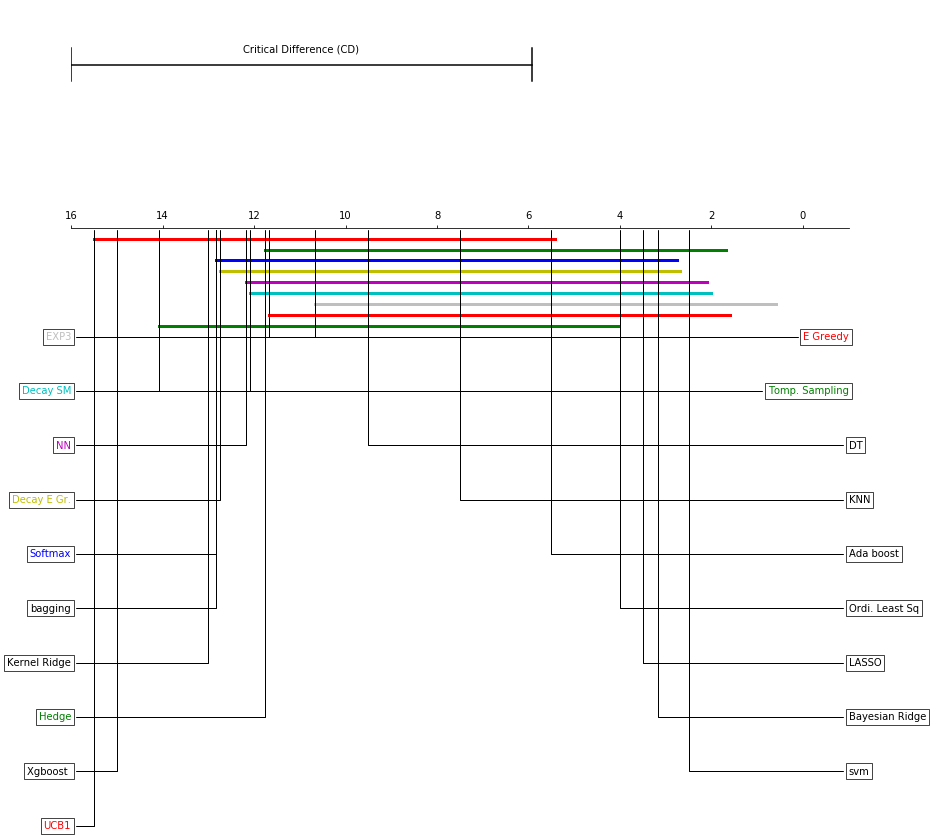

In [17]:
# input data
cd = CD
limits=(16,-1)
fig, ax = plt.subplots(figsize=(18,10))
plt.subplots_adjust(left=0.2, right=0.8)

# set up plot
ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

# CD bar
ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k") 
ax.text(limits[0]-cd/2., 0.92, "Critical Difference (CD)", ha="center", va="bottom") 

# annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")

ax.annotate("UCB1", xy=(meanRanks[11], 0.6), xytext=(0,-0.5),ha="right",  **kw, color="r")
ax.annotate("Xgboost ", xy=(meanRanks[8], 0.6), xytext=(0,-0.4),ha="right",  **kw, color="k")
ax.annotate("Hedge", xy=(meanRanks[16], 0.6), xytext=(0,-0.3),ha="right",  **kw, color="g")
ax.annotate("Kernel Ridge", xy=(meanRanks[4], 0.6), xytext=(0,-0.2),ha="right",  **kw, color="k")
ax.annotate("bagging", xy=(meanRanks[1], 0.6), xytext=(0,-0.1),ha="right",  **kw, color="k")
ax.annotate("Softmax", xy=(meanRanks[14], 0.6), xytext=(0,0),ha="right",  **kw, color="b")
ax.annotate("Decay E Gr.", xy=(meanRanks[13], 0.6), xytext=(0,0.1),ha="right",  **kw, color="y")
ax.annotate("NN", xy=(meanRanks[10], 0.6), xytext=(0,0.2),ha="right",  **kw, color="m")
ax.annotate("Decay SM", xy=(meanRanks[15], 0.6), xytext=(0,0.3),ha="right",  **kw, color="c")
ax.annotate("EXP3", xy=(meanRanks[17], 0.6), xytext=(0,0.4),ha="right",  **kw, color="0.75")


ax.annotate("svm", xy=(meanRanks[7], 0.6), xytext=(1,-0.4),ha="left",  **kw, color="k")
ax.annotate("Bayesian Ridge", xy=(meanRanks[9], 0.6), xytext=(1,-0.3),ha="left",  **kw, color="k")
ax.annotate("LASSO", xy=(meanRanks[5], 0.6), xytext=(1,-0.2),ha="left",  **kw, color="k")
ax.annotate("Ordi. Least Sq", xy=(meanRanks[6], 0.6), xytext=(1,-0.1),ha="left",  **kw, color="k")
ax.annotate("Ada boost", xy=(meanRanks[0], 0.6), xytext=(1,0),ha="left",  **kw, color="k")
ax.annotate("KNN", xy=(meanRanks[3], 0.6), xytext=(1,0.1),ha="left",  **kw, color="k")
ax.annotate("DT", xy=(meanRanks[2], 0.6), xytext=(1,0.2),ha="left",  **kw, color="k")
ax.annotate("Tomp. Sampling", xy=(meanRanks[18], 0.6), xytext=(1,0.3),ha="right",  **kw, color="g")
ax.annotate("E Greedy", xy=(meanRanks[12], 0.6), xytext=(1,0.4),ha="right",  **kw, color="r")

#bars
ax.plot([meanRanks[11],meanRanks[11]-CD],[0.58,0.58], color="r", lw=3)
ax.plot([meanRanks[16],meanRanks[16]-CD],[0.56,0.56], color="g", lw=3)
ax.plot([meanRanks[14],meanRanks[14]-CD],[0.54,0.54], color="b", lw=3)
ax.plot([meanRanks[13],meanRanks[13]-CD],[0.52,0.52], color="y", lw=3)
ax.plot([meanRanks[10],meanRanks[10]-CD],[0.5,0.5], color="m", lw=3)
ax.plot([meanRanks[15],meanRanks[15]-CD],[0.48,0.48], color="c", lw=3)
ax.plot([meanRanks[17],meanRanks[17]-CD],[0.46,0.46], color="0.75", lw=3)
ax.plot([meanRanks[12],meanRanks[12]-CD],[0.44,0.44], color="r", lw=3)
ax.plot([meanRanks[18],meanRanks[18]-CD],[0.42,0.42], color="g", lw=3)




plt.show()